<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [114]:
#Importation de la librairie Pandas
import pandas as pd

In [115]:
#Importation de la librairie plotly express
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [116]:
#Importation de la librairie matplotlib
import matplotlib.pyplot as plt

In [117]:
#Importation de la librairie numpy
import numpy as np

In [118]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
data=pd.read_excel("liaison.xlsx")
print(data.columns.tolist()) 
print(data.columns.values)
print(data.columns)

#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
pd.options.display.max_columns = None
pd.options.display.max_rows = None

['product_id', 'id_web']
['product_id' 'id_web']
Index(['product_id', 'id_web'], dtype='object')


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [119]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichiers csv</h3>
</div>

<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
L'étudiant va être très certainement confronté à des difficultés pour ouvrir ce fichier.
Il faudra donc qu'il se documente sur les points suivants:<br>
- notion d'encodage en informatique. ("UTF-8", "ISO-8859-1", etc)<br>
- manipulation de fichier csv, tsv, etc<br>
<br>
Pour lui faire réussir cette étape, l'étudiant devrait suivre ces directives:<br>
- Explorer le fichier à l'aide d'un outil comme Notepad++ afin de visualiser la structure du fichier<br>
- ... ou d'utiliser Excel pour les mêmes raisons. Mais dans ce cas l'étudiant pourrait être tenté de convertir le fichier csv en xlsx, ce que je ne recommande pas: si le fichier est trop gros pour Excel cela deviendra une souffrance de procéder ainsi<br>
- apprendre à ourvrir un fichier avec python à l'aide de l'instruction suivante: <code>with open(nom_fichier, "rb") as f: </code><br>
- utiliser une bibliothèque comme <code>chardet</code> pour tenter d'identifier l'encodage du fichier<br>
</div>

In [120]:
#Avant d'utiliser pandas pour le chargement du fichier, explorons la structure du fichier
#Pour cela utilisons l'instruction ci-dessous qui permet d'ouvrir un fichier texte
with open("caracteristiques_vins.csv", "rb") as f:
    file = f.read()
    
#Et affichons le:
print(file)

b"post_name;poids;R\xe9gion;Domaine;Appellation;Couleur;C\xe9page;Mill\xe9sime;Garde;Contenance;Degr\xe9 d'alcool;Temp\xe9rature d\xe9gustation;Alliance mets\r\npierre-jean-villa-saint-joseph-preface-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2020;4-7 ans;75cl;13%;15\xb0C;Charcuterie, Lapin, Viande rouge, Volaille\r\npierre-jean-villa-saint-joseph-tilde-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2019;6-8 ans;75cl;13%;15\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-croze-hermitage-accroche-coeur-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Crozes-Hermitage;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;15\xb0C;Viande rouge, Volaille\r\npierre-jean-villa-igp-gamine-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Collines Rhodaniennes;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;14\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-cote-rotie-carmina-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;C\xf4te R\xf4tie;Rouge;100% Syrah;2019;10-20 ans;7

In [121]:
#Vous avez dû constater que les champs sont séparées par des point-virgule

#tentons d'ouvrir le fichier avec pandas avec cet élément
df_caracteristiques = pd.read_csv("caracteristiques_vins.csv", sep=";")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 17: invalid continuation byte

Nous obtenons une erreur, elle est de type <code>UnicodeDecodeError</code><br>
Celle-ci semble être liée à l'encodage du fichier<br>
Utilisons la bibliothèque <code>chardet</code> pour tenter d'identifier l'encodage du fichier

In [122]:
#Importation de la bibilothèque 
#(à noter que c'est une mauvaise pratique d'importer une bibliothèque au milieu d'un programme)
#(celle-ci doit toujours figurer au début du script)
import chardet

Rendez-vous sur le lien ci-après pour identifier l'instruction dont vous aurez besoin:<br>
https://chardet.readthedocs.io/en/latest/usage.html#basic-usage

In [123]:
#Identification de l'encodage du fichier
with open("caracteristiques_vins.csv","rb") as f:
    result=chardet.detect(f.read())

In [124]:
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [125]:
#A présent que nous connaissons les séparateurs et l'encodage du fichier
#Utilisons Pandas pour charger le fichier
#Je vous laisse le soin de renseigner les champs manquants
nom_du_fichier = "caracteristiques_vins.csv"
type_de_separateur = ";"
encodage_du_fichier_csv = "Windows-1252"

df_caracteristiques = pd.read_csv(nom_du_fichier, sep=type_de_separateur, encoding=encodage_du_fichier_csv)
df_caracteristiques.head(3)

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [126]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))


Le tableau comporte 825 observation(s) 
Le tableau comporte 5 colonne(s)


In [127]:
#Consulter le nombre de colonnes
print(df_erp.columns)

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status'], dtype='object')


In [128]:
#La nature des données dans chacune des colonnes
print(df_erp.dtypes)

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object


In [129]:
#Le nombre de valeurs présentes dans chacune des colonnes
print(df_erp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB
None


In [130]:
#Afficher les 5 premières lignes de la table
df_erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [131]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
doublons = df_erp['product_id'].duplicated().sum() 
print(f"Le nombre de doublons est : {doublons}")


Le nombre de doublons est : 0


In [132]:
#Afficher les valeurs distinctes de la colonne stock_status
valeurs_distinctes= df_erp['stock_status'].unique()
print(valeurs_distinctes,"\n ----------------------- \n")

#À quelle(s) autre(s) colonne(s) sont-elles liées ?
#Les valeurs de la colonne stock_status sont liées à celles de la colonne stock_quantity.
#Lorsqu'une valeur est égale à 0 dans la colonne stock_status on retrouve qu'elle correpond à la valeur outofstock dans la colonne stock_quantity
#Lorsqu'une valeur est égale à 1 dans la colonne stock_status on retrouve qu'elle correpond à la valeur instock dans la colonne stock_quantity


['outofstock' 'instock'] 
 ----------------------- 



In [133]:
#Création d'une colonne "stock_status_2"
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(lambda x: 'outofstock' if x == 0 else 'instock')
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
0,3847,1,24.20,0,outofstock,outofstock
1,3849,1,34.30,0,outofstock,outofstock
2,3850,1,20.80,0,outofstock,outofstock
3,4032,1,14.10,0,outofstock,outofstock
4,4039,1,46.00,0,outofstock,outofstock
5,4040,1,34.30,0,outofstock,outofstock
6,4041,1,32.70,15,instock,instock
7,4042,1,31.20,34,instock,instock
8,4043,1,60.00,12,instock,instock
9,4045,1,42.60,66,instock,instock


In [134]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76      True

In [135]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
(df_erp["stock_status"] == df_erp["stock_status_2"]).sum()

824

In [136]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
df_erp.loc[df_erp["stock_status"] != df_erp["stock_status_2"]].index

Int64Index([443], dtype='int64')

In [137]:
#Corriger la ou les données incohérentes
df_erp.loc[443, "stock_status"]="outofstock"
df_erp.loc[df_erp["stock_status"] != df_erp["stock_status_2"]]



,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [138]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
df_erp['price'].isnull()  
print("Le nombre de valeurs manquantes est: ", df_erp['price'].isnull().sum())
print("Le nombre d'articles ayant des prix non renseignés est:" ,df_erp['price'].isna().sum()) #Saisir l'instruction manquante dans la fonction format

#Afficher le prix maximum de la colonne "price"
max=df_erp['price'].max()
print(f"Le prix maximum est : {max}")
#Afficher le prix minimum de la colonne "price"
min=df_erp['price'].min()
print(f"Le prix minimum est : {min}")

Le nombre de valeurs manquantes est:  0
Le nombre d'articles ayant des prix non renseignés est: 0
Le prix maximum est : 225.0
Le prix minimum est : 5.2


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [139]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
df_erp['stock_quantity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 825 entries, 0 to 824
Series name: stock_quantity
Non-Null Count  Dtype
--------------  -----
825 non-null    int64
dtypes: int64(1)
memory usage: 6.6 KB


In [140]:
#Afficher la quantité minimum de la colonne "stock_quantity"
print(f"La quantité minimale est : {df_erp['stock_quantity'].min()}")

#Afficher la quantité maximum de la colonne "stock_quantity"
print(f"La quantité maximale est : {df_erp['stock_quantity'].max()}")

La quantité minimale est : 0
La quantité maximale est : 578


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier onsale_web.xlsx</h3>
</div>
 

In [141]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
df_erp['onsale_web'].info()
print ("\nLes valeurs contenues dans la colonne sont:" , (df_erp['onsale_web'].unique()))
print ("Le fichier onsale_web indique si oui ou non le produit est commercialisé sur internet")

<class 'pandas.core.series.Series'>
RangeIndex: 825 entries, 0 to 824
Series name: onsale_web
Non-Null Count  Dtype
--------------  -----
825 non-null    int64
dtypes: int64(1)
memory usage: 6.6 KB

Les valeurs contenues dans la colonne sont: [1 0]
Le fichier onsale_web indique si oui ou non le produit est commercialisé sur internet


In [142]:
#Quelles sont les colonnes à conserver selon vous?
#Les colonnes à conserver sont : product_id, price, stock_quantity

In [144]:
#Supprimer les colonnes comportant le libellé "stock_status"
#Cette colonne est redondante avec la colonne "stock_quantity". Dans notre projet cette information n'est pas utile.
df_erp.drop(columns =['stock_status'],inplace=True)
df_erp

,product_id,onsale_web,price,stock_quantity
0,3847,1,24.20,0
1,3849,1,34.30,0
2,3850,1,20.80,0
3,4032,1,14.10,0
4,4039,1,46.00,0
5,4040,1,34.30,0
6,4041,1,32.70,15
7,4042,1,31.20,34
8,4043,1,60.00,12
9,4045,1,42.60,66


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>

In [145]:
#Dimension du dataset
print(df_web.shape, "\n ----------------------- \n")

#Nombre d'observations
observations= df_web.shape[0]
print(f"Le nombre d'observations est : {observations}" "\n ----------------------- \n")


#Nombre de caractéristiques
caractéristiques=df_web.shape[1]
print(f"Le nombre de caractéristiques est : {caractéristiques}")


(1513, 28) 
 ----------------------- 

Le nombre d'observations est : 1513
 ----------------------- 

Le nombre de caractéristiques est : 28


In [146]:
#Renommer la colonne sku "id_web" car leurs valeurs sont identiques et faciliter les jonctions
df_web.rename(columns={'sku':'id_web'},inplace=True)

In [147]:
#Consulter le nombre de colonnes
caractéristiques=len(df_web.columns)

#La nature des données dans chacune des colonnes
print(df_web.dtypes, "\n-----------------------")


id_web                           object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [148]:
#Le nombre de valeurs présentes dans chacune des colonnes
print(f"Le nombre de valeurs présentes dans chaque colonne est :\n{df_web.count()}")

Le nombre de valeurs présentes dans chaque colonne est :
id_web                   1428
virtual                  1513
downloadable             1513
rating_count             1513
average_rating           1430
total_sales              1430
tax_status                716
tax_class                   0
post_author              1430
post_date                1430
post_date_gmt            1430
post_content                0
post_title               1430
post_excerpt              716
post_status              1430
comment_status           1430
ping_status              1430
post_password               0
post_name                1430
post_modified            1430
post_modified_gmt        1430
post_content_filtered       0
post_parent              1430
guid                     1430
menu_order               1430
post_type                1430
post_mime_type            714
comment_count            1430
dtype: int64


In [149]:
#Selon vous, quelles sont les colonnes à conserver ?
df_web.info()
#Les colonnes à conserver après avoir identifié leurs différentes valeurs et utilités respectives sont: id_web, post_name, total_sales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [150]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web.drop(columns =['virtual','downloadable', 'rating_count','average_rating','tax_status', 'tax_class', 'post_title', "post_content", "post_status", "comment_status" , "ping_status","post_password", "post_content_filtered", "post_parent", "menu_order","post_mime_type","comment_count",'post_type','post_author','post_type','post_date_gmt','post_date','post_excerpt','post_modified','post_modified_gmt','guid'],axis=1,inplace=True)


In [151]:
#Visualisation des valeurs de la colonne sku renomée id_web
(df_web['id_web'].unique())
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
for idx,val in df_web['id_web'].dropna().items():
    if type(val)!= int:
        print(idx,val)

0 bon-cadeau-25-euros
797 13127-1
1209 bon-cadeau-25-euros
1511 13127-1


In [152]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
print(df_web.loc[0])
print (df_web.loc[797])
print (df_web.loc[1209])
print(df_web.loc[1511])

id_web            bon-cadeau-25-euros
total_sales                      10.0
post_name      bon-cadeau-de-25-euros
Name: 0, dtype: object
id_web                                                13127-1
total_sales                                               0.0
post_name      clos-du-mont-olivet-chateauneuf-du-pape-2007-2
Name: 797, dtype: object
id_web            bon-cadeau-25-euros
total_sales                      10.0
post_name      bon-cadeau-de-25-euros
Name: 1209, dtype: object
id_web                                                13127-1
total_sales                                               0.0
post_name      clos-du-mont-olivet-chateauneuf-du-pape-2007-2
Name: 1511, dtype: object


In [153]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
print ("Les valeurs <bon-cadeau-25-euros> seront supprimées et les valeurs <13127-1> seront remplacées par <13127>")

Les valeurs <bon-cadeau-25-euros> seront supprimées et les valeurs <13127-1> seront remplacées par <13127>


In [154]:
#Supprimer les valeurs <bon-cadeau-25-euros>
df_web = df_web.drop([df_web.index[0], df_web.index[1209]])

#Remplacer les valeurs <13127-1> par 13127
#Considérant que l'article était en double il sera supprimé lors du nettoyage des données
df_web.id_web[797] = 13127
df_web.id_web[1511] = 13127


In [155]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
id_web_clean=df_web['id_web'].dropna()
doublons =id_web_clean.duplicated().sum() 
print(f"Le nombre de doublons est : {doublons}")

Le nombre de doublons est : 714


In [156]:
#Identifier les lignes sans code articles
df_web[df_web['id_web'].isnull()]


,id_web,total_sales,post_name
178,NaN,NaN,NaN
179,NaN,NaN,NaN
227,NaN,NaN,NaN
230,NaN,NaN,NaN
231,NaN,NaN,NaN
233,NaN,NaN,NaN
237,NaN,NaN,NaN
283,NaN,NaN,NaN
309,NaN,NaN,NaN
310,NaN,NaN,NaN


In [157]:
total_sans_codes= df_web['id_web'].isnull().sum()
print (f"Le nombre de lignes sans code articles est: {total_sans_codes}")

Le nombre de lignes sans code articles est: 85


In [158]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_filtre = df_web.loc[df_web['id_web'].isnull()]

#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_filtre.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_web       0 non-null      object 
 1   total_sales  2 non-null      float64
 2   post_name    2 non-null      object 
dtypes: float64(1), object(2)
memory usage: 2.7+ KB


In [160]:
#3 - Que constatez-vous?
#Toutes les colonnes ne comportent pas uniquement des valeurs non renseignées, il y a 2 valeurs renseignées mais qui n'ont pas d'id_web

In [161]:
#Supprimer les lignes comprenant les valeurs non renseignées
df_web.dropna (inplace= True)

#supprimer les doublons
df_web.drop_duplicates (inplace= True) 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [162]:
#Dimension du dataset
print(df_liaison.shape, "\n ----------------------- \n")

#Nombre d'observations
observations= df_liaison.shape[0]
print(f"Le nombre d'observations est : {observations}" "\n ----------------------- \n")

#Nombre de caractéristiques
caractéristiques=df_liaison.shape[1]
print(f"Le nombre de caractéristiques est : {caractéristiques}")


(825, 2) 
 ----------------------- 

Le nombre d'observations est : 825
 ----------------------- 

Le nombre de caractéristiques est : 2


In [163]:
#Consulter le nombre de colonnes
caractéristiques=len(df_liaison.columns)
print(f"Le nombre de colonnes est : {caractéristiques}")

#La nature des données dans chacune des colonnes
print(df_liaison.dtypes, "\n-----------------------")

#Le nombre de valeurs présentes dans chacune des colonnes
print(f"Le nombre de valeurs présente dans chaque colonne est :\n{df_liaison.count()}")



Le nombre de colonnes est : 2
product_id     int64
id_web        object
dtype: object 
-----------------------
Le nombre de valeurs présente dans chaque colonne est :
product_id    825
id_web        734
dtype: int64


In [164]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
doublons=df_liaison['product_id'].isnull().sum()
print(f"Le nombre de doublons est : {doublons}")
print(f"Les valeurs de cette colonne sont toutes uniques")


Le nombre de doublons est : 0
Les valeurs de cette colonne sont toutes uniques


In [165]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
doublons=df_liaison['id_web'].isnull().sum()
print(f"Le nombre de doublons est : {doublons}")
print(f"Les valeurs de cette colonne ne sont pas toutes uniques")


Le nombre de doublons est : 91
Les valeurs de cette colonne ne sont pas toutes uniques


In [166]:
#Avons-nous des articles sans correspondances?
df_liaison.isnull().sum()
print ( "Il n'y aucune valeur nulle dans la colonne product_id, en revanche on retrouve 91 valeurs nulles dans la colonne id_web")

Il n'y aucune valeur nulle dans la colonne product_id, en revanche on retrouve 91 valeurs nulles dans la colonne id_web


In [167]:
#Supprimer les doublons
df_liaison.drop_duplicates (inplace= True) 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Analyse exploratoire du fichier caracteristiques_vins.xlsx</h3>
</div>

In [168]:
#Dimension du dataset
print(df_caracteristiques.shape, "\n ----------------------- \n")

#Nombre d'observations
observations= df_caracteristiques.shape[0]
print(f"Le nombre d'observations est : {observations}" "\n ----------------------- \n")

#Nombre de caractéristiques
caractéristiques=df_caracteristiques.shape[1]
print(f"Le nombre de caractéristiques est : {caractéristiques}")

(611, 13) 
 ----------------------- 

Le nombre d'observations est : 611
 ----------------------- 

Le nombre de caractéristiques est : 13


In [169]:
#Consulter le nombre de colonnes
caracteristiques=len(df_caracteristiques.columns)
print ("Le nombre de colonnes est:",caracteristiques)

#La nature des données dans chacune des colonnes
print("La nature des données de chaque colonne est:",df_caracteristiques.dtypes, "\n-----------------------")

#Le nombre de valeurs présentes dans chacune des colonnes
print(f"Le nombre de valeurs présentes dans chaque colonne est :\n{df_caracteristiques.count()}")


Le nombre de colonnes est: 13
La nature des données de chaque colonne est: post_name                   object
poids                       object
Région                      object
Domaine                     object
Appellation                 object
Couleur                     object
Cépage                      object
Millésime                  float64
Garde                       object
Contenance                  object
Degré d'alcool              object
Température dégustation     object
Alliance mets               object
dtype: object 
-----------------------
Le nombre de valeurs présentes dans chaque colonne est :
post_name                  611
poids                      611
Région                     586
Domaine                    577
Appellation                559
Couleur                    566
Cépage                     571
Millésime                  541
Garde                      569
Contenance                 611
Degré d'alcool             586
Température dégustation    574
Al

In [170]:
#Affichage des 5 premières lignes du dataset
df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


In [171]:
#Quels sont les produits avec des informations manquantes?
df_caracteristiques.isnull().sum()
lignes_manquantes = df_caracteristiques[df_caracteristiques.isnull().any(axis=1)]
lignes_manquantes


,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
60,gosset-champagne-grande-reserve,1.5 kg,Champagne,Gosset,Champagne,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine"
62,champagne-gosset-grand-rose,1.5 kg,Champagne,Gosset,Champagne,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons"
63,champagne-mailly-gc-brut-reserve,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Chaource, Légumes croquants, Suprême..."
64,champagne-mailly-grand-cru-extra-brut-2012,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Carpaccios, Caviar, Huîtres"
65,champagne-mailly-grand-cru-brut-rose,1.5 kg,Champagne,Mailly Grand Cru,Champagne,NaN,"10% Chardonnay, 90% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Tapas, Viande Blanche"
66,champagne-mailly-grand-cru-intemporelle-rose-2009,1.5 kg,Champagne,Mailly Grand Cru,Champagne,NaN,"40% Chardonnay, 60% Pinot Noir",NaN,10 ans et +,75cl,12%,10°C,"Apéritif, Fruits, Noix de St Jacques, Poissons"
67,champagne-mailly-grand-cru-intemporelle-2010,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"40% Chardonnay, 60% Pinot Noir",NaN,10 ans et +,75cl,12%,10°C,"Apéritif, Fruits, Noix de St Jacques, Poissons"
116,domaine-montrose-cotes-de-thongue-rose-2019,1.5 kg,Languedoc-Roussillon,Domaine Montrose,Côtes de Thongue,Rosé,"Cabernet Sauvignon, Grenache, Syrah",2021.0,NaN,75cl,"12,50%",11°C,"Apéritif, Grillades, Légumes croquants, Salade"
125,frissant-chenin-pierres-2018,1.5 kg,Vallée de la Loire,Xavier Frissant,Touraine Amboise,Blanc,Chenin,2018.0,3-5 ans,75cl,NaN,11°C,"Crustacés, Poisson grillé, Viande Blanche"
126,xavier-frissant-touraine-roses-du-clos-2018,1.5 kg,Vallée de la Loire,Xavier Frissant,Touraine,Blanc,Fié Gris,2019.0,3-5 ans,75cl,NaN,11°C,"Crustacés, Poisson en sauce, Viande Blanche"


In [172]:
#Est-il possible de corriger les données manquantes? 
#On peut les corriger en les comparant avec des produits similaires, ou en regroupant des valeurs numériques homogènes pour leur attribuer une moyenne


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [173]:
#Fusion des fichiers df_erp et df_liaison
df_merge=pd.merge(df_erp, df_liaison, on='product_id',how='inner',indicator=True) 
df_merge

,product_id,onsale_web,price,stock_quantity,id_web,_merge
0,3847,1,24.20,0,15298,both
1,3849,1,34.30,0,15296,both
2,3850,1,20.80,0,15300,both
3,4032,1,14.10,0,19814,both
4,4039,1,46.00,0,19815,both
5,4040,1,34.30,0,15303,both
6,4041,1,32.70,15,14975,both
7,4042,1,31.20,34,16042,both
8,4043,1,60.00,12,14980,both
9,4045,1,42.60,66,16041,both


In [174]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
df_merge[df_merge['_merge']!='both']


,product_id,onsale_web,price,stock_quantity,id_web,_merge


In [175]:
print ("Toutes les lignes concordent bien entre elles")

Toutes les lignes concordent bien entre elles


In [176]:
#Après vérification on peut supprimer la colonne merge
df_merge.drop('_merge', axis=1, inplace=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [177]:
#Fusionnez les datasets df_merge et df_web
df_merge = pd.merge(df_merge,df_web, on="id_web",how='inner', indicator=True)

In [178]:
#Avons-nous des lignes sans correspondances?
df_merge[df_merge['_merge']!='both']


,product_id,onsale_web,price,stock_quantity,id_web,total_sales,post_name,_merge


In [179]:
print ("Toutes les lignes concordent bien entre elles")

Toutes les lignes concordent bien entre elles


In [180]:
#Après vérification on peut supprimer la colonne merge
df_merge.drop('_merge', axis=1, inplace=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.3 - Jonction du fichier df_merge et df_caracteristiques</h3>
</div>

In [181]:
#Fusion de la table df_merge et df_caracteristiques
df_merge = pd.merge(df_merge, df_caracteristiques, on = 'post_name', how='left',indicator=True)

In [182]:
#Après vérification on peut supprimer la colonne merge
df_merge.drop('_merge', axis=1, inplace=True)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

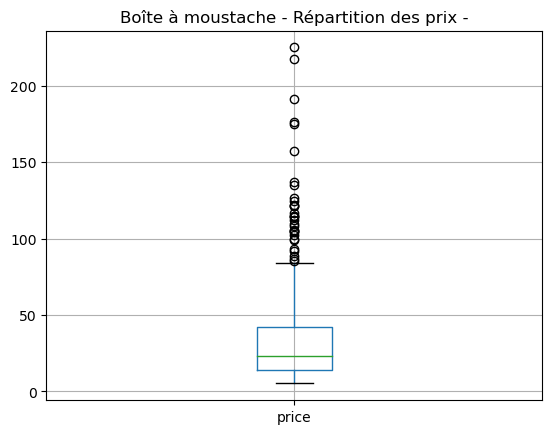

In [183]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
df_merge.boxplot(column='price')
plt.title('Boîte à moustache - Répartition des prix -')
plt.show()


In [184]:
#Autre méthode avec plotly express
figure = px.box(df_merge, y='price',points='all',title='Répartition des prix')
figure.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [185]:
import statistics

In [225]:
#Calculer la moyenne du prix
moyenne_prix = statistics.mean(df_merge.price)
rounded_moyenne = round(moyenne_prix, 2)
print("La moyenne des prix est de", rounded_moyenne)

#Calculer l'écart-type du prix
ecart_type = np.std(df_merge.price)
rounded_average_ecart = round(ecart_type, 2)
print("L'écart type des prix est :", rounded_average_ecart)


La moyenne des prix est de 32.49
L'écart type des prix est : 27.8


In [226]:
from scipy import stats
#Calculer le Z-score
mean = sum(df_merge.price) / len(df_merge.price)
std_dev = stats.tstd(df_merge.price)
z_scores = [(x - mean) / std_dev for x in df_merge.price]
print('Le z score est :', z_scores)


Le z score est : [0.5935055011424124, 0.5935055011424124, -0.5711414088327075, -0.9593570454910808, -0.9629516347193992, -0.6897628533672104, -0.2620067351973362, 0.23404657831058526, -0.8587085470981691, -0.7760329948468491, -0.2620067351973362, -0.12541234452124186, -0.16495282603274292, -0.8335464224999413, -0.5639522303760709, 0.7372890702751432, -0.4668983212114776, -0.8623031363264875, -0.9126273855229432, 0.16934397220085648, -0.9593570454910808, 0.42455980741145355, 0.4101814504981805, -0.34827687667697466, -0.7041412102804836, -0.28716885979556406, -0.42016866124334007, -0.8946544393813519, -0.3878173581884757, -0.9126273855229432, -0.37703359050352087, 0.025560403068125622, -0.4129794827867036, -0.8874652609247153, -0.6502223718557095, -0.37703359050352087, -0.81557347635835, -0.8623031363264875, -0.855113957869851, -0.6933574425955288, -0.7544654594769393, 0.575532555000821, 0.9853157270291039, -0.8946544393813519, -0.2260608429141535, -0.7077357995088018, -0.596303533430935

In [228]:
#Quel est le seuil prix dont z-score est supérieur à 3?
import sys
z_score=3+sys.float_info.epsilon
seuil_prix = rounded_moyenne + (z_score * ecart_type)
seuil_prix


115.89022418682293

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [229]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
round(df_merge.describe(),2)

,product_id,onsale_web,price,stock_quantity,total_sales,Millésime,chiffre_affaires_par_article,Part_CA,Part_Cumulative_CA,part_quantité,Part_Cumulative_quantité
count,713.00,713.0,713.00,713.00,713.00,541.00,713.00,713.00,713.00,713.00,713.00
mean,5028.19,1.0,32.49,28.78,4.00,2017.94,98.62,0.14,62.57,0.14,88.35
std,787.54,0.0,27.82,48.04,8.52,2.43,307.85,0.44,28.19,0.30,19.81
min,3847.00,1.0,5.20,0.00,0.00,2003.00,0.00,0.00,0.21,0.00,3.36
25%,4277.00,1.0,14.10,2.00,0.00,2017.00,0.00,0.00,35.65,0.00,85.04
50%,4794.00,1.0,23.50,12.00,1.00,2019.00,15.20,0.02,66.81,0.04,99.05
75%,5709.00,1.0,42.20,35.00,4.00,2020.00,91.00,0.13,85.37,0.14,100.00
max,7338.00,1.0,225.00,578.00,96.00,2021.00,4704.00,6.69,100.00,3.36,100.00


In [230]:
#Définissez un seuil pour les articles "outliers" en prix
q1=df_merge['price'].quantile(0.25)
q3=df_merge['price'].quantile(0.75)
IQR =q3-q1
coef=round(IQR*1.5,2)
coef
lim_sup = q3+ coef
print("Le seuil de prix pour les articles Outliers est : \n",lim_sup)

Le seuil de prix pour les articles Outliers est : 
 84.35


In [231]:
#Définissez le nombre d'articles outliers
print("Le nombre d'articles Outliers: ", df_merge[df_merge['price']>lim_sup].shape[0]) 

#Définissez la proportion de l'ensemble du catalogue "outliers"
print("La proportion de l'ensemble du catalogue outliers: ", (df_merge[df_merge['price']>lim_sup].shape[0])/(df_merge['price'].shape[0])*100,2) 


Le nombre d'articles Outliers:  32
La proportion de l'ensemble du catalogue outliers:  4.488078541374474 2


In [232]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
figure = px.box(df_merge, y='price')
figure.show()
#On peut utiliser une boîte à moustache pour distinguer les valeurs aberrantes qui se détachent des autres, cependant ça peut être juste des vins qui coûtent chers, il faudra vérifier avec les équipes commerciales


In [233]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y=df_merge['price'],
 name="Suspected Outliers",
    boxpoints='suspectedoutliers', 
    marker=dict(
        color='rgba(219, 64, 82, 0.6)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)')),
    line_color='rgb(8,81,156)'))
fig.update_layout(
    title='Boîte à moustache pour identifier les Outliers',
    yaxis=dict(title='price'),
)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA et des quantités vendues</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [238]:

##############################
# Calculer le CA su site web #
##############################

# Calculer le chiffre d'affaires total de tous les articles
CA_total = (df_merge['total_sales'] * df_merge['price']).sum()
print(f"Le chiffre d'affaires total : {CA_total}")


Le chiffre d'affaires total : 70318.59999999999


In [239]:
#Créez une colonne calculant le CA par article
df_merge['chiffre_affaires_par_article'] = df_merge["price"] * df_merge["total_sales"]

#Calculez la somme de la colonne "ca_par_article"
print (f"Total chiffre d'affaires par article : {df_merge['chiffre_affaires_par_article'].sum()}")


Total chiffre d'affaires par article : 70318.59999999999


In [240]:
#Ce résultat correspond au chiffre d'affaire du site web
#Le chiffre d'affaires total correspond bien au total du chiffre d'affaires par article


In [241]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge['chiffre_affaires_par_article'] = df_merge["price"] * df_merge["total_sales"]
df_merge.sort_values('chiffre_affaires_par_article', ascending=False)


,product_id,onsale_web,price,stock_quantity,id_web,total_sales,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,chiffre_affaires_par_article,Part_CA,Part_Cumulative_CA,part_quantité,Part_Cumulative_quantité
0,4334,1,49.00,0,7818,96.0,champagne-gosset-grand-blanc-de-blanc,1.5 kg,Champagne,Gosset,Champagne,Blanc,Chardonnay,NaN,4 ans,75cl,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",4704.0,6.689553,44.230403,3.362522,3.362522
1,4144,1,49.00,11,1662,87.0,champagne-gosset-grand-rose,1.5 kg,Champagne,Gosset,Champagne,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",4263.0,6.062407,23.648651,3.047285,6.409807
55,4402,1,176.00,8,3510,13.0,cognac-frapin-vip-xo,1.5 kg,NaN,NaN,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,2288.0,3.253762,52.698006,0.455342,51.698774
15,4142,1,53.00,8,11641,30.0,champagne-gosset-grand-millesime-2006,1.5 kg,Champagne,Gosset,Champagne,Blanc,"44% Chardonnay, 56% Pinot Noir",2015.0,8-10 ans,75cl,12%,10°C,"Agneau, Apéritif, Fromage de chèvre, Noix de S...",1590.0,2.261137,17.586243,1.050788,25.814361
7,4141,1,39.00,1,304,40.0,gosset-champagne-grande-reserve,1.5 kg,Champagne,Gosset,Champagne,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine",1560.0,2.218474,15.325106,1.401051,16.007005
77,4355,1,126.50,2,12589,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1.5 kg,Champagne,Egly-Ouriet,Champagne,Blanc,Pinot Noir,NaN,5-10 ans,75cl,"12,50%",10°C,"Apéritif, Desserts, Tartes aux fruits",1391.5,1.978851,48.198770,0.385289,60.840630
162,4352,1,225.00,0,15940,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,1.5 kg,Champagne,Egly-Ouriet,Champagne,Blanc,"30% Chardonnay, 70% Pinot Noir",NaN,10 ans et +,75cl,"12,50%",10°C,"Apéritif, Crustacés, Desserts, Poissons",1125.0,1.599861,45.880748,0.175131,82.381786
11,4153,1,29.00,0,16237,36.0,elian-daros-cotes-du-marmandais-clos-baquey-2015,1.5 kg,Sud Ouest,Elian Daros,Côtes du Marmandais,Rouge,"Abouriou, Cabernet Franc, Cabernet Sauvignon, ...",2014.0,10-15 ans,75cl,13%,16°C,"Gibier, Grillades, Viande rouge",1044.0,1.484671,25.782937,1.260946,21.225919
6,6206,1,25.20,120,16580,41.0,domaine-giudicelli-patrimonio-blanc-2019,1.5 kg,Corse,Domaine Giudicelli,Patrimonio,Blanc,Vermentino,2020.0,3-5 ans,75cl,"13,5%",11°C,"Fruits de mer, Langoustes, Poissons, Risotto",1033.2,1.469313,96.496659,1.436077,14.605954
2,4068,1,16.60,157,16416,62.0,gilles-robin-crozes-hermitage-papillon-2019,1.5 kg,Rhône,Gilles Robin,Crozes-Hermitage,Rouge,100% Syrah,2021.0,3-5 ans,75cl,"13,5%",15°C,"Apéritif, Charcuterie, Viande rouge, Volaille",1029.2,1.463624,9.226862,2.171629,8.581436


In [242]:

#Supprimer les Nan pour nettoyer le fichier
df_merge['chiffre_affaires_par_article'].dropna(inplace=True)


In [243]:
#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True, inplace=True)

#Afficher les 20 premier articles en 
df_merge.sort_values(by = 'chiffre_affaires_par_article', ascending = False).head(20)


,product_id,onsale_web,price,stock_quantity,id_web,total_sales,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,chiffre_affaires_par_article,Part_CA,Part_Cumulative_CA,part_quantité,Part_Cumulative_quantité
0,4334,1,49.0,0,7818,96.0,champagne-gosset-grand-blanc-de-blanc,1.5 kg,Champagne,Gosset,Champagne,Blanc,Chardonnay,NaN,4 ans,75cl,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",4704.0,6.689553,44.230403,3.362522,3.362522
1,4144,1,49.0,11,1662,87.0,champagne-gosset-grand-rose,1.5 kg,Champagne,Gosset,Champagne,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",4263.0,6.062407,23.648651,3.047285,6.409807
55,4402,1,176.0,8,3510,13.0,cognac-frapin-vip-xo,1.5 kg,NaN,NaN,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,2288.0,3.253762,52.698006,0.455342,51.698774
15,4142,1,53.0,8,11641,30.0,champagne-gosset-grand-millesime-2006,1.5 kg,Champagne,Gosset,Champagne,Blanc,"44% Chardonnay, 56% Pinot Noir",2015.0,8-10 ans,75cl,12%,10°C,"Agneau, Apéritif, Fromage de chèvre, Noix de S...",1590.0,2.261137,17.586243,1.050788,25.814361
7,4141,1,39.0,1,304,40.0,gosset-champagne-grande-reserve,1.5 kg,Champagne,Gosset,Champagne,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine",1560.0,2.218474,15.325106,1.401051,16.007005
77,4355,1,126.5,2,12589,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1.5 kg,Champagne,Egly-Ouriet,Champagne,Blanc,Pinot Noir,NaN,5-10 ans,75cl,"12,50%",10°C,"Apéritif, Desserts, Tartes aux fruits",1391.5,1.978851,48.198770,0.385289,60.840630
162,4352,1,225.0,0,15940,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,1.5 kg,Champagne,Egly-Ouriet,Champagne,Blanc,"30% Chardonnay, 70% Pinot Noir",NaN,10 ans et +,75cl,"12,50%",10°C,"Apéritif, Crustacés, Desserts, Poissons",1125.0,1.599861,45.880748,0.175131,82.381786
11,4153,1,29.0,0,16237,36.0,elian-daros-cotes-du-marmandais-clos-baquey-2015,1.5 kg,Sud Ouest,Elian Daros,Côtes du Marmandais,Rouge,"Abouriou, Cabernet Franc, Cabernet Sauvignon, ...",2014.0,10-15 ans,75cl,13%,16°C,"Gibier, Grillades, Viande rouge",1044.0,1.484671,25.782937,1.260946,21.225919
6,6206,1,25.2,120,16580,41.0,domaine-giudicelli-patrimonio-blanc-2019,1.5 kg,Corse,Domaine Giudicelli,Patrimonio,Blanc,Vermentino,2020.0,3-5 ans,75cl,"13,5%",11°C,"Fruits de mer, Langoustes, Poissons, Risotto",1033.2,1.469313,96.496659,1.436077,14.605954
2,4068,1,16.6,157,16416,62.0,gilles-robin-crozes-hermitage-papillon-2019,1.5 kg,Rhône,Gilles Robin,Crozes-Hermitage,Rouge,100% Syrah,2021.0,3-5 ans,75cl,"13,5%",15°C,"Apéritif, Charcuterie, Viande rouge, Volaille",1029.2,1.463624,9.226862,2.171629,8.581436


In [244]:
#Graphique en barre des 20 premiers articles avec plotly express
figure = px.bar(df_merge.sort_values(by = 'chiffre_affaires_par_article', ascending = False).head(20), x= 'post_name',y= 'chiffre_affaires_par_article',text_auto=True,title='Classemet CA des 20 premiers articles')
figure.show()

In [245]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge['Part_CA'] = (df_merge['chiffre_affaires_par_article'] / df_merge['chiffre_affaires_par_article'].sum())*100

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['Part_Cumulative_CA'] = df_merge['Part_CA'].cumsum() 


In [246]:
#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
articles = df_merge[df_merge['Part_Cumulative_CA'] <= 80]
nombre = len(articles)

print(f"Le nombre d'articles représentant 80% du CA est:", nombre)


Le nombre d'articles représentant 80% du CA est: 163


In [247]:
df_merge


,product_id,onsale_web,price,stock_quantity,id_web,total_sales,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,chiffre_affaires_par_article,Part_CA,Part_Cumulative_CA,part_quantité,Part_Cumulative_quantité
0,4334,1,49.00,0,7818,96.0,champagne-gosset-grand-blanc-de-blanc,1.5 kg,Champagne,Gosset,Champagne,Blanc,Chardonnay,NaN,4 ans,75cl,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",4704.0,6.689553,6.689553,3.362522,3.362522
1,4144,1,49.00,11,1662,87.0,champagne-gosset-grand-rose,1.5 kg,Champagne,Gosset,Champagne,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",4263.0,6.062407,12.751960,3.047285,6.409807
2,4068,1,16.60,157,16416,62.0,gilles-robin-crozes-hermitage-papillon-2019,1.5 kg,Rhône,Gilles Robin,Crozes-Hermitage,Rouge,100% Syrah,2021.0,3-5 ans,75cl,"13,5%",15°C,"Apéritif, Charcuterie, Viande rouge, Volaille",1029.2,1.463624,14.215584,2.171629,8.581436
3,4200,1,5.80,190,16295,46.0,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,1.5 kg,Languedoc-Roussillon,Mas de Daumas Gassac,Pays d'Hérault,Rosé,"Carignan, Syrah",2021.0,2 ans,75cl,12%,11°C,"Apéritif, Grillades, Légumes croquants, Salade",266.8,0.379416,14.595000,1.611208,10.192644
4,4172,1,5.70,167,16210,43.0,maurel-pays-oc-chardonnay-2019,1.5 kg,Languedoc-Roussillon,Maison Ventenac,Pays d'Oc,Blanc,Chardonnay,2021.0,3 ans,75cl,"12,50%",11°C,"Apéritif, Poissons, Volaille",245.1,0.348556,14.943557,1.506130,11.698774
5,4187,1,13.30,90,16189,42.0,le-pas-de-lescalette-languedoc-petits-pas-2019,1.5 kg,Languedoc-Roussillon,Le Pas de l'Escalette,Languedoc,Rouge,"Carignan, Grenache, Syrah",2020.0,3-5 ans,75cl,"13,5%",14°C,"Agneau, Charcuterie, Grillades",558.6,0.794384,15.737941,1.471103,13.169877
6,6206,1,25.20,120,16580,41.0,domaine-giudicelli-patrimonio-blanc-2019,1.5 kg,Corse,Domaine Giudicelli,Patrimonio,Blanc,Vermentino,2020.0,3-5 ans,75cl,"13,5%",11°C,"Fruits de mer, Langoustes, Poissons, Risotto",1033.2,1.469313,17.207254,1.436077,14.605954
7,4141,1,39.00,1,304,40.0,gosset-champagne-grande-reserve,1.5 kg,Champagne,Gosset,Champagne,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine",1560.0,2.218474,19.425728,1.401051,16.007005
8,4729,1,8.60,151,38,38.0,emile-boeckel-cremant-brut-blanc-de-blancs,1.5 kg,Alsace,Emile Boeckel,Crémant d'Alsace,Blanc,NaN,NaN,3-5 ans,75cl,12%,9°C,"Apéritif, Fromages, Huîtres, Poissons",326.8,0.464742,19.890470,1.330998,17.338004
9,6047,1,10.90,46,16264,38.0,chateau-de-la-liquiere-faugeres-ampoule-2019,1.5 kg,Languedoc-Roussillon,Château de La Liquière,Faugères,Rouge,"Cinsault Majoritaire, Grenache, Syrah",2020.0,3 ans,75cl,14%,14°C,"Apéritif, Charcuterie, Volaille",414.2,0.589033,20.479503,1.330998,18.669002


In [248]:

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion=(nombre/len(df_merge))*100
proportion=round(proportion)
print ("La proportion que représente ce groupe d'articles dans le catalogue entier est :", {proportion})


La proportion que représente ce groupe d'articles dans le catalogue entier est : {23}


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [249]:
###############################
# Palmares des articles en quantité #
###############################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge = df_merge.sort_values('total_sales', ascending=False)

#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True, inplace=True)

#Afficher les 20 premiers articles en quantité
df_merge.sort_values(by = 'stock_quantity', ascending = False).head(20)


,product_id,onsale_web,price,stock_quantity,id_web,total_sales,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,chiffre_affaires_par_article,Part_CA,Part_Cumulative_CA,part_quantité,Part_Cumulative_quantité
42,4208,1,7.6,578,16024,16.0,domaine-montrose-cotes-de-thongue-rose-2019,1.5 kg,Languedoc-Roussillon,Domaine Montrose,Côtes de Thongue,Rosé,"Cabernet Sauvignon, Grenache, Syrah",2021.0,NaN,75cl,"12,50%",11°C,"Apéritif, Grillades, Légumes croquants, Salade",121.6,0.172927,44.618351,0.560420,45.814361
10,6207,1,25.2,363,16077,37.0,domaine-giudicelli-patrimonio-rouge-2016,1.5 kg,Corse,Domaine Giudicelli,Patrimonio,Rouge,Nielluccio,2018.0,6-8 ans,75cl,14%,15°C,"Cuisine méditerranéenne, Gibiers à plumes, Pig...",932.4,1.325965,21.805468,1.295972,19.964974
289,4963,1,7.0,289,15958,2.0,chateau-turcaud-bordeaux-rouge-2016,1.5 kg,Bordeaux,Château Turcaud,Bordeaux,Rouge,"Cabernet Sauvignon, Merlot",2018.0,4-7 ans,75cl,13%,16°C,"Viande Blanche, Viande rouge, Volaille",14.0,0.019909,93.752862,0.070053,95.271454
17,4861,1,8.5,284,15307,29.0,philippe-nusswitz-duche-uzes-orenia-rouge-2017,1.5 kg,Languedoc-Roussillon,Les Vins de Philippe Nusswitz,Duché d'Uzès,Rouge,"Grenache, Syrah",2018.0,3-5 ans,75cl,"13,5%",15°C,"Grillades, Viande Blanche, Viande rouge, Volaille",246.5,0.350547,29.363070,1.015762,27.880911
95,4176,1,13.5,276,15629,9.0,hortus-pic-saint-loup-la-bergerie-2018,1.5 kg,Languedoc-Roussillon,Domaine de l'Hortus,Pic Saint-Loup,Rouge,"Grenache, Mourvèdre, Syrah",2020.0,3-5 ans,75cl,13%,15°C,"Grillades, Viande Blanche, Volaille",121.5,0.172785,64.179037,0.315236,66.024518
75,4058,1,8.7,267,16318,11.0,mourgues-du-gres-costieres-de-nimes-galets-rou...,1.5 kg,Rhône,Mourgues du Grès,Costières de Nîmes,Rouge,"Carignan, Grenache, Mourvèdre, Syrah",2020.0,3-5 ans,75cl,14%,15°C,"Charcuterie, Grillades, Viande rouge, Volaille",95.7,0.136095,59.390119,0.385289,61.225919
344,4858,1,6.5,257,16342,1.0,chateau-turcaud-rose-2019,1.5 kg,Bordeaux,Château Turcaud,Bordeaux,Rosé,"Cabernet Franc, Cabernet Sauvignon, Merlot",2020.0,3 ans,75cl,"12,50%",10°C,"Apéritif, Charcuterie, Grillades, Poisson gril...",6.5,0.009244,97.008046,0.035026,97.583187
442,4609,1,11.8,237,15145,0.0,francois-bergeret-hautes-cotes-de-beaune-rouge...,1.5 kg,Bourgogne,François Bergeret,Hautes Côtes de Beaune,Rouge,Pinot Noir,2017.0,3-5 ans,75cl,"13,5%",15°C,"Fondue Bourguignonne, Fricassé aux cèpes, Riso...",0.0,0.000000,100.000000,0.000000,100.000000
106,5779,1,5.8,211,16213,8.0,maurel-pays-d-oc-syrah-2019,1.5 kg,Languedoc-Roussillon,Maison Ventenac,Pays d'Oc,Rouge,Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Gibier, Grillades, Viande rouge",46.4,0.065985,66.203679,0.280210,69.036778
64,4191,1,9.3,209,16263,12.0,chateau-de-la-liquiere-faugeres-les-amandiers-...,1.5 kg,Languedoc-Roussillon,Château de La Liquière,Faugères,Rouge,"Carignan, Grenache, Mourvèdre, Syrah",2019.0,3-5 ans,75cl,14%,14°C,"Cuisine méditerranéenne, Grillades, Légumes fa...",111.6,0.158706,55.478494,0.420315,56.812609


In [250]:
#Graphique en barre des 20 premiers articles avec plotly express
figure = px.bar(df_merge.sort_values(by = 'total_sales', ascending = False).head(20), x= 'post_name',y= 'total_sales',text_auto=True,color_discrete_sequence=['indianred'],title='Classement des 20 premiers articles des ventes')
figure.show()

In [251]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_merge['part_quantité'] = (df_merge['total_sales'] / df_merge['total_sales'].sum())*100

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['Part_Cumulative_quantité'] = df_merge['part_quantité'].cumsum() 


In [252]:
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
selected_articles = df_merge[df_merge['Part_Cumulative_quantité'] <= 80]
nombre_articles = len(selected_articles)

print(f"Le nombre d'articles représentant 80% des ventes est:", nombre_articles)

Le nombre d'articles représentant 80% des ventes est: 150


In [253]:
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion=(nombre_articles/len(df_merge))*100
round(proportion)

21

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [254]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
df_merge.to_excel('df_merge.xlsx',index=False)